In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn import datasets
from matplotlib.colors import ListedColormap

In [41]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def log_loss(w, X, y):
    # здесь должны быть рассчитаны параметры градиента и значение функции потерь
    lin_z = np.sum(w * X, axis=0)
    sig = sigmoid(lin_z)
    loss = (1 / X.shape[1]) * np.sum(y * np.log(sig) + (1 - y) * np.log(1 - sig), axis=1).item() * -1
    grad = (1 / X.shape[1]) * ((sig - y) @ X.T)
    return loss, grad

def optimize(w, X, y, n_iterations, eta):
    # потери будем записывать в список для отображения в виде графика
    losses = []
    for i in range(n_iterations):   
        # считаем веса
        loss, grad = log_loss(w, X, y)
        losses.append(loss)
        w = w - (eta * grad.reshape(-1, 1))
    return w, losses

def predict(w, X, b=0.5):
    z = w.T @ X
    probabilities = 1 / (1 + np.exp(-z))
    y_predicted = (probabilities >= b).astype(int)
    return y_predicted

In [42]:
# Ваши данные
X = np.array([
    [1, 3],
    [2, 4],
    [5, 6]
])
y = np.array([1, 0, 1])


X_tr = X.transpose()
y_tr = y.reshape(1, y.shape[0])

w0 = np.array([0.5, -0.5]).reshape(-1, 1)

# Вызов вашей функции
loss, gradient = log_loss(w0, X_tr, y_tr)

# Ожидаемые результаты (из вашего примера)
expected_loss = 0.867
expected_gradient = np.array([-1.101, -1.616])

# Проверка результатов
def test_log_loss():
    # Проверка функции потерь
    assert np.isclose(round(loss, 3), expected_loss, atol=1e-3), f"Ошибка в функции потерь: ожидалось {expected_loss}, получено {loss}"
    
    # Проверка градиента
    assert np.allclose(np.round(gradient, 3), expected_gradient, atol=1e-3), f"Ошибка в градиенте: ожидалось {expected_gradient}, получено {gradient}"
    
    print("Тест пройден успешно!")

# Запуск теста для тестирования функции log loss для того чтобы разобраться как все работает
test_log_loss()

Тест пройден успешно!


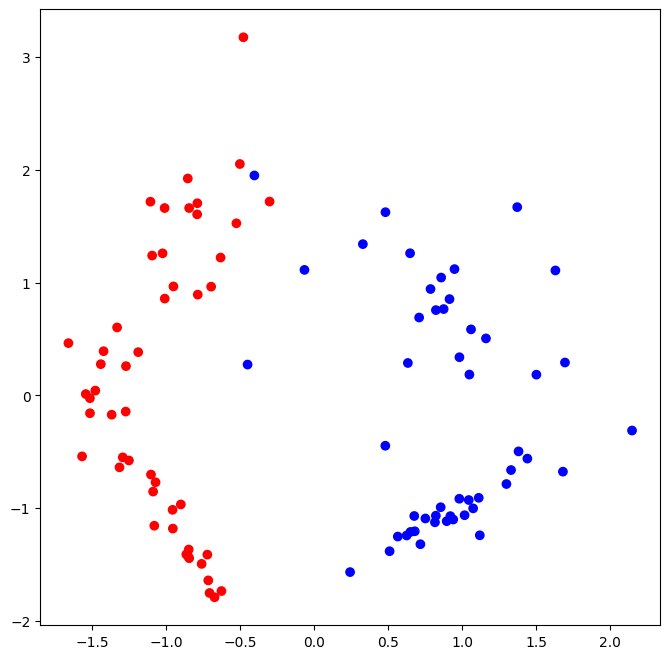

In [43]:
# сгеренируем данные
classes = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=1)

# и изобразим их на графике
colors = ListedColormap(['red', 'blue'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)
plt.show()

In [44]:
XData, yData = classes
# Создание DataFrame
df = pd.DataFrame(XData, columns=['Feature_1', 'Feature_2'])  # Названия колонок для признаков
df['Target'] = yData  # Добавляем столбец с метками классов
df

,Feature_1,Feature_2,Target
0,1.300227,-0.785654,1
1,1.441844,-0.560086,1
2,-0.847924,-1.366213,0
3,-0.722150,-1.411294,0
4,-1.272215,0.259451,0
...,...,...,...
95,0.940461,-1.100299,1
96,-0.845212,1.660864,0
97,-1.423689,0.391846,0
98,0.982517,0.338476,1


In [45]:
# перемешивание датасета
np.random.seed(12) # это число позволяет постоянно получать одну и ту же "случайность"
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]

# разбивка на обучающую и тестовую выборки
train_proportion = 0.7
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]

print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (70, 2)
Размер массива признаков тестовой выборки (30, 2)
Размер массива ответов для обучающей выборки (70,)
Размер массива ответов для тестовой выборки (30,)


In [46]:
X_train_tr = X_train.transpose()
y_train_tr = y_train.reshape(1, y_train.shape[0])
X_test_tr = X_test.transpose()
y_test_tr = y_test.reshape(1, y_test.shape[0])

In [47]:
# инициализируем начальный вектор весов
w0 = np.zeros((X_train_tr.shape[0], 1))

n_iterations = 1000
eta = 0.05

w, losses = optimize(w0, X_train_tr, y_train_tr, n_iterations, eta)

y_predicted_test = predict(w, X_test_tr)
y_predicted_train = predict(w, X_train_tr)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train_tr)*100.0)
test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test_tr)*100.0)

print(f"Итоговый вектор весов w: {w}\n")
print("Сравнивая качество предсказаний с истинными значениями\n")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Итоговый вектор весов w: [[3.72659902]
 [0.22383415]]

Сравнивая качество предсказаний с истинными значениями

Точность на обучающей выборке: 98.571
Точность на тестовой выборке: 96.667


Функция успешно прошла тестирование, продемонстрировав высокую точность как на обучающей, так и на тестовой выборках: точность на обучающих данных составила 98.571%, а на тестовых — 96.667%, что подтверждает хорошую обобщающую способность модели и отсутствие переобучения

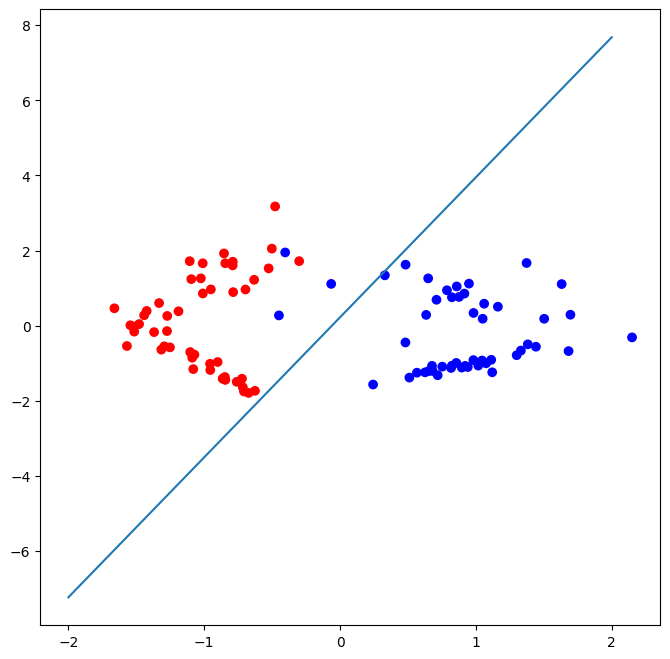

In [48]:
data = np.linspace(-2, 2, 100)

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)
plt.plot(data, w[0,0]*data+w[1,0])

plt.show()

## График изменения функции потерь

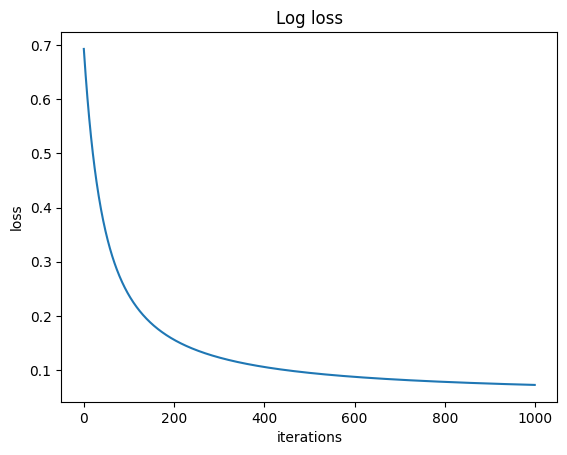

In [49]:
plt.title('Log loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(range(len(losses)), losses)

plt.show()

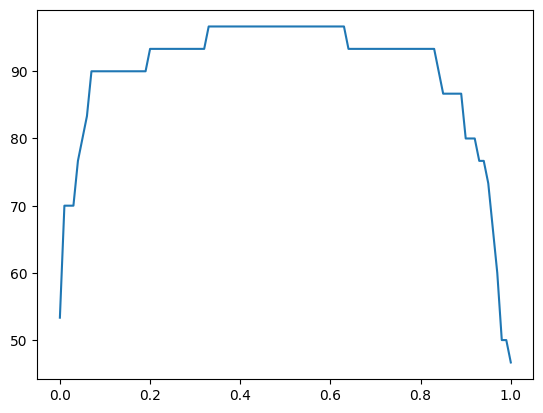

In [50]:
test_acc = []
b_l = []

for b in range(0, 101):
  y_predicted_test = predict(w, X_test_tr, b/100)
  y_predicted_train = predict(w, X_train_tr, b/100)

  # В качестве меры точности возьмем долю правильных ответов

  test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test_tr)*100.0)

  b_l.append(b/100)
  test_acc.append(test_accuracy)

plt.plot(b_l, test_acc)
plt.show()